```
http://bit.ly/VITMAV45-task2
```
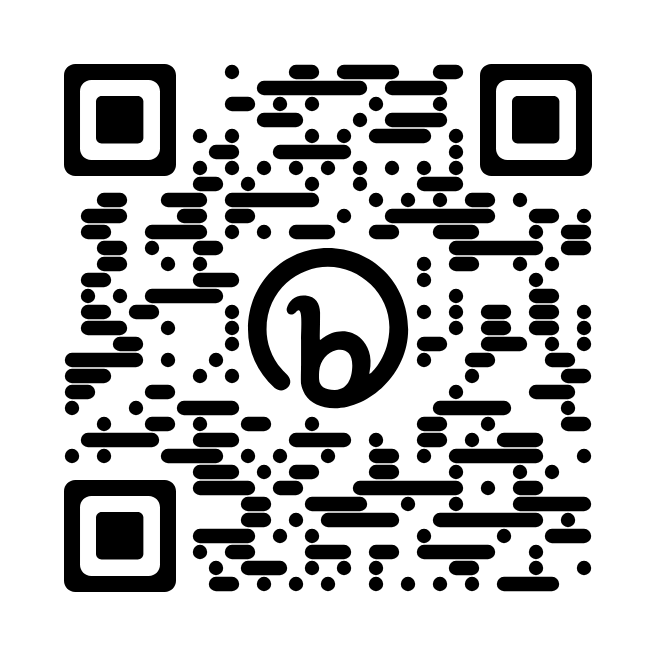

# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2020 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu), Kalapos András
</PRE>

# Konvolúciós neurális hálózatok - feladat

Az előző gyakorlaton egyszerű MLP hálóval oldottuk meg a kézzel írt számjegyek osztályozásának problémáját az MNIST adatbázison. E feladat során ugyanezt a problémát nektek kell megoldani, konvolúciós hálót (CNN) használva.

Konvolúciós hálót az előző órán megismert MLP hálóhoz hasonló módon tudunk létrehozni, `Dense` rétegek helyett `Conv2D` réteget használva.

Keras  `Conv2D` kovolúciós réteg dokumentációja: https://keras.io/api/layers/convolution_layers/convolution2d/

```
Conv2D(filters=..., kernel_size=..., activation=..., input_shape=(...,...,...,))
```

A létrehozandó CNN architektúra:

|                 | filters/units | kernel _size/pool_size | activation |
| --------------- | :-----------: | :--------------------: | :--------: |
| Conv2D          |      32       |          5x5           |    relu    |
| Conv2D          |      64       |          5x5           |    relu    |
| MaxPooling2D    |       -       |          2x2           |     -      |
| Dropout(0.25)   |       -       |           -            |     -      |
| Flatten()       |       -       |           -            |     -      |
| Dense           |      128      |           -            |   'relu'   |
| Dropout(0.5)    |       -       |           -            |     -      |
| Dense (kimenet) |       ?       |           -            | 'softmax'  |


Néhány tanács:

* A tanítás előtt kapcsolátok be a GPU-t Colab alatt (Runtime/Change runtime type).
* Minibatch méret: 128
* Validációs halmaz mérete: 20%
* Optimalizációs algoritmus: Adam

**Fontos**
* A tanítás álljon le, ha a 10 epochon át nem javul a validációs hiba
* **A legjobb modelt mentse a tanítás a `model.hdf5` fájlba.**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

## Adatok betöltése és előkészítése

In [2]:
# adatok betöltése, cél változók: x_train, y_train, x_test, y_test

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Az adatok előkészítését részben megírtuk előre
# Kékek átskálázása 0-255 tartományból 0.0-1.0 tartományba
x_train = x_train / 255.0
x_test = x_test / 255.0

# Képek tárolása kép jellegű tenzor elrendezésben (28x28-as felbontású képek)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [4]:
# címkék (y_train, y_test) előkészítése osztályozáshoz
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

## Háló létrehozása, tanítása

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 64)        100416    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 9, 9, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 5184)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               663680    
                                                      

In [ ]:
early_stopping = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath='model.hdf5', save_best_only=True, verbose=1)


In [ ]:
model.fit(
    x_train, y_train,
    validation_split=0.2,
    batch_size=128,
    callbacks=[
        early_stopping,
        checkpointer
    ]
)

375/375 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.9228
Epoch 1: val_loss improved from inf to 0.05446, saving model to model.hdf5
375/375 [==============================] - 14s 10ms/step - loss: 0.2499 - accuracy: 0.9228 - val_loss: 0.0545 - val_accuracy: 0.9841


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Kiértékelés

A kiértékelés kódját már (részben) előző gyakorlaton megismertük. Itt nincs feladatotok.

In [ ]:
from keras.models import load_model
model = load_model("model.hdf5")
test_err = model.evaluate(x_test,y_test)
print("Teszt hiba:", test_err[0], "Teszt pontosság:", test_err[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9851
Teszt hiba: 0.04681716486811638 Teszt pontosság: 0.9850999712944031


### Metrikák, tévesztési mátrix
Nézzük először, hogy hogyan tudjuk kiszámolni az osztályozáshoz tartozó legfontosabb metrikákat és hogyan tudjuk megjeleníteni a konfúziós mátrixot:

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
# először is nyerjük ki a predikciókat (valószínüség és hozzá tartozó pontosságot)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))
print("\nKonfúziós mátrix: ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

313/313 [==============================] - 1s 2ms/step
test accuracy: 0.9851
Precision 0.9852410483413243
Recall 0.984964346890243
f1_score 0.9850650183112437

Konfúziós mátrix: 
[[ 975    1    0    1    0    0    0    2    1    0]
 [   0 1126    1    4    0    0    0    2    2    0]
 [   2    1 1012    6    0    0    1    8    2    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    0    0    0  968    0    2    1    1   10]
 [   1    0    0   14    0  873    2    1    1    0]
 [   4    3    0    0    1    4  945    0    1    0]
 [   0    3    5    3    0    1    0 1013    1    2]
 [   6    1    3    1    1    2    0    2  954    4]
 [   1    5    0    5    5    3    1    6    4  979]]


A tévesztési mátrixot vizuálisan is érdemes vizsgálni:

<Axes: >

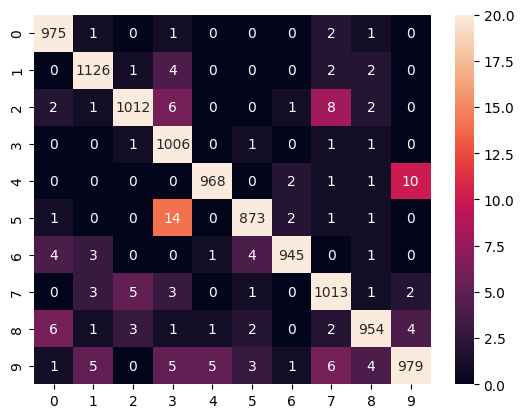

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', vmax=20) # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat

Eredmények beküldése: https://forms.gle/p4SbEAN6gLSaQvsr9

Vizsgáljuk meg a TensorBoard-ban a logokat:

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

### Aktíváció vizsgálata a convoluciós rétegekben
https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8 alapján

In [ ]:
#új modell készítése az aktivációs elemzéshez
from keras.models import Model
# Az első két réteger nézzük csak
layer_outputs = [layer.output for layer in model.layers[0:2]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
#Kiválasztjuk a teszthalmaz első 4 képét
img = x_test[0:4].reshape(-1,28,28,1)
#Ezek a cimkék: 7,2,1,0
np.argmax(y_test[0:4],axis=1)

array([7, 2, 1, 0])

In [ ]:
#A 4 db képet ráadjuk a hálózatra:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 118ms/step


In [ ]:
#Kigyűjtjük a rétegek neveit
layer_names = []
for layer in model.layers[0:2]:
    layer_names.append(layer.name)


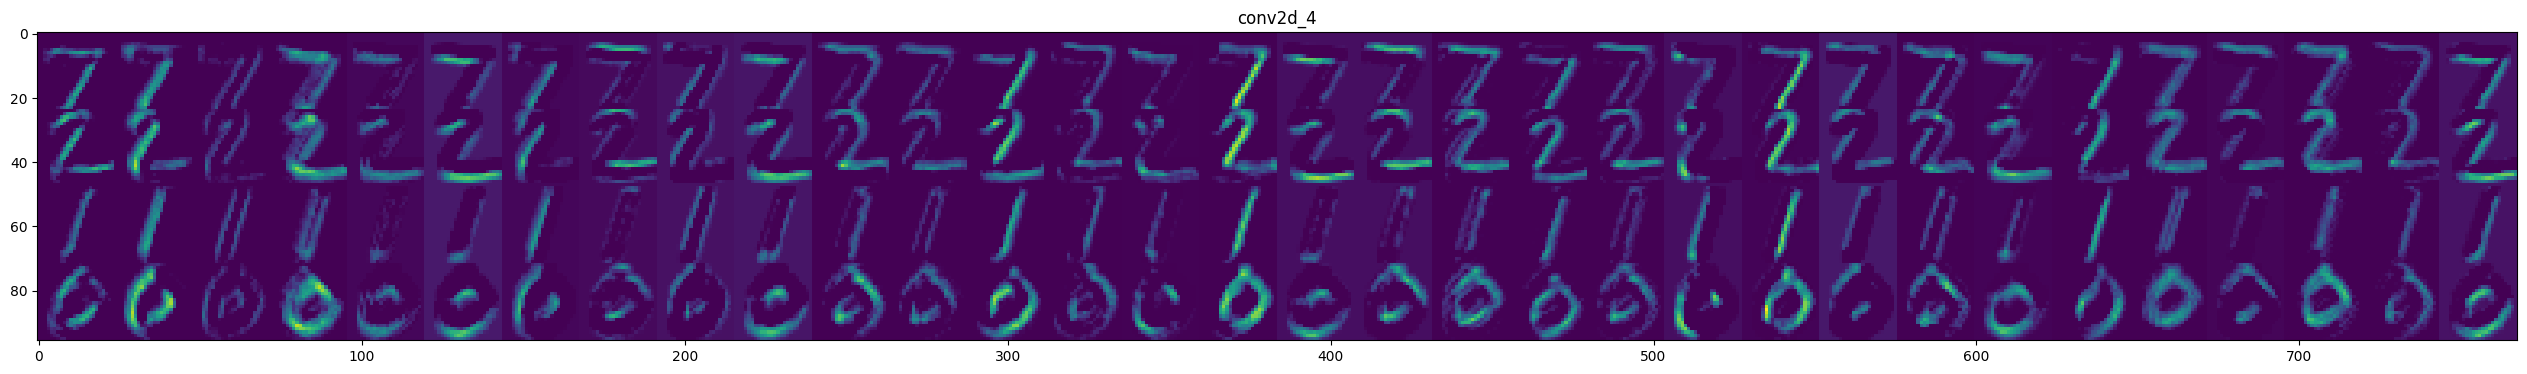

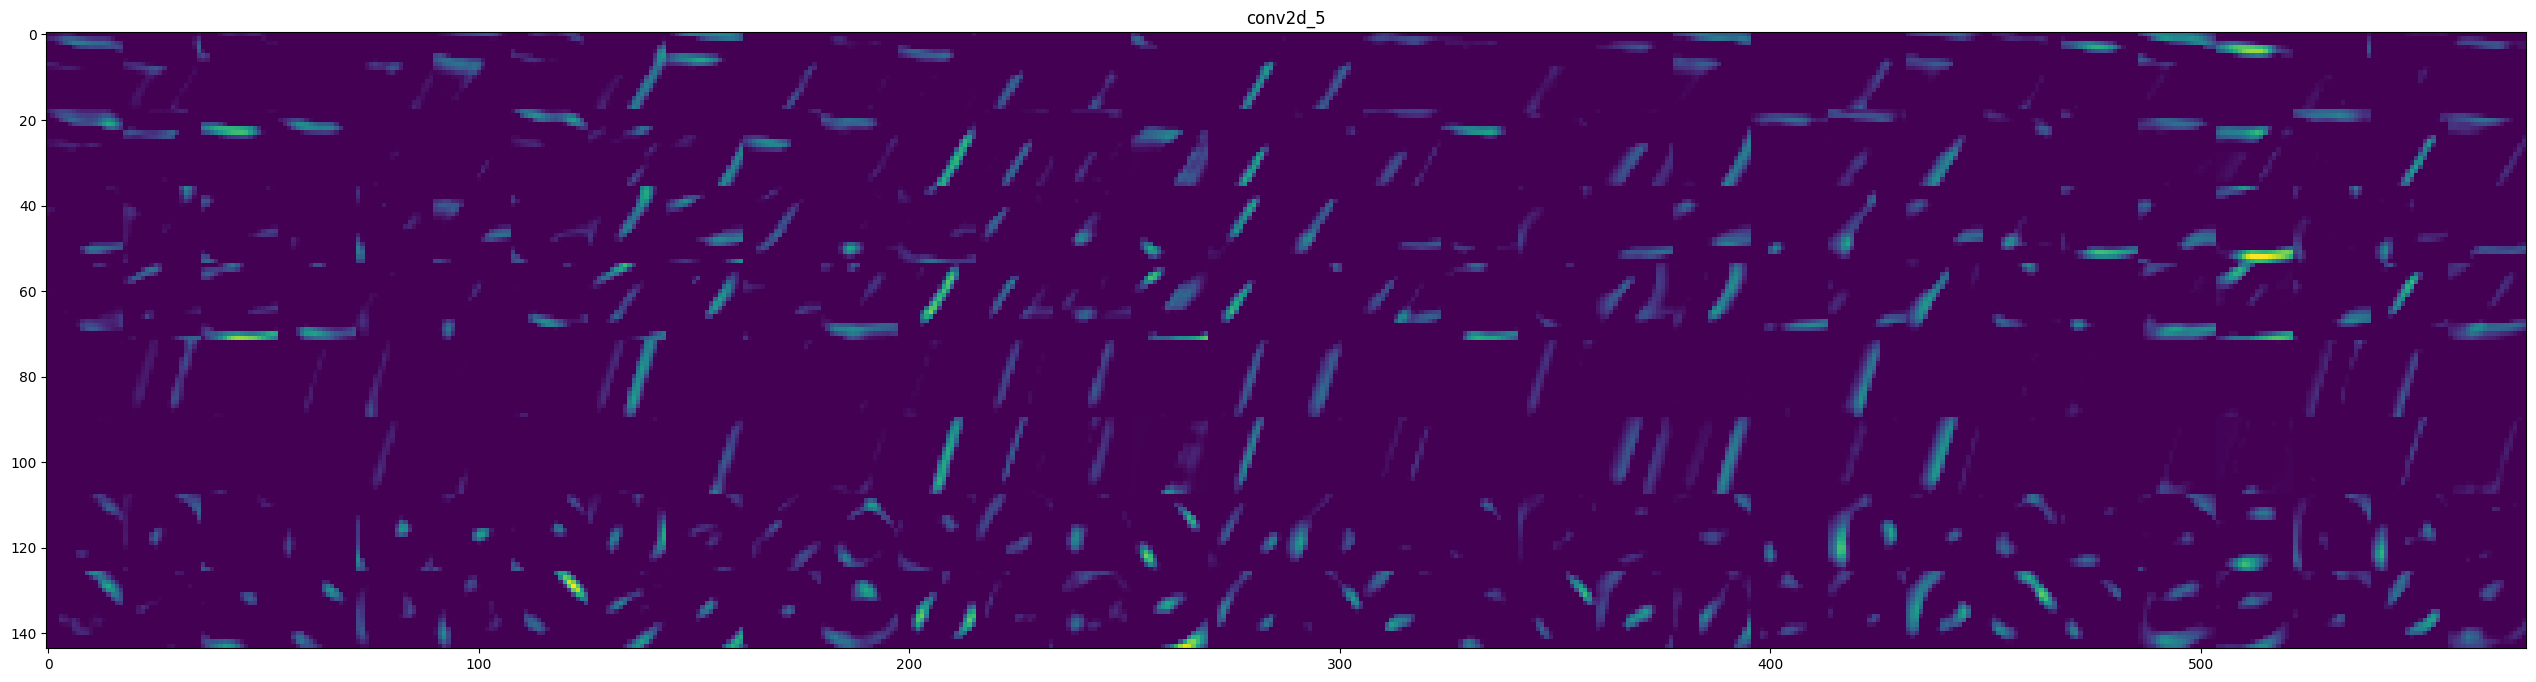

In [ ]:
import matplotlib.pyplot as plt
images_per_row = 32
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    ns= layer_activation.shape[0]
    display_grid = np.zeros((size * n_cols*ns, images_per_row * size))
    for s in range(ns):
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[s,
                                             :, :,
                                             col * images_per_row + row]
            #Az aktivációt normalizálhatjuk is, ekkor kicsi más jellegű képeket kapuk. Érdemes kipróbálni True és False-al is
            #Új kép generálása előtt az aktivációt is generáljuk újra!
            if False:
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[(col) * size+ size * n_cols*s: (col + 1) * size+ size * n_cols*s, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Visszajelzés

[`https://bit.ly/VITMAV45-feedback`](https://bit.ly/VITMAV45-feedback)

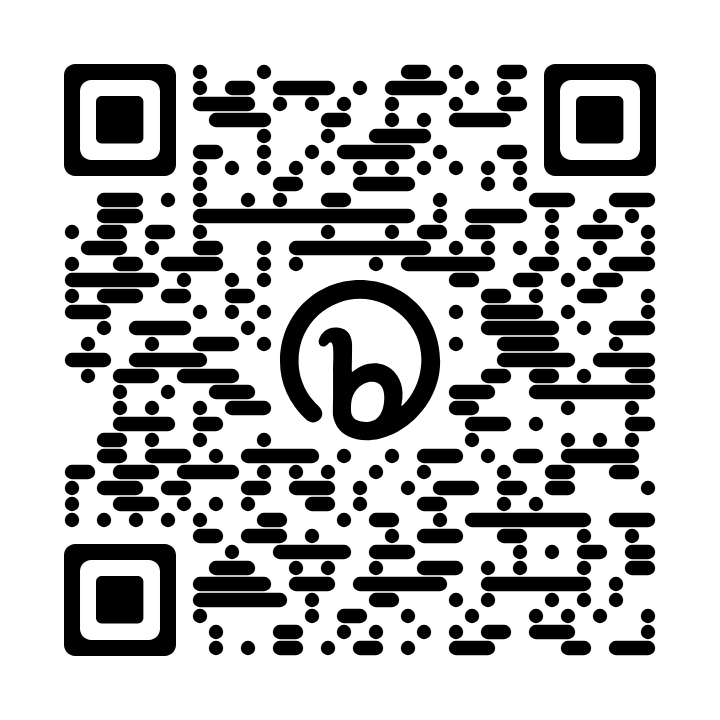